In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [77]:
pd.set_option('display.max_columns', None)

In [78]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [80]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [81]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## From the information above here are some conclusions:
1. There are no missing values. There are 21613 rows in the dataset.


Prepare data for EDA:

1. Convert each column to the correct format
2. Search for and remove outliers

And here is a picture that describes each columns
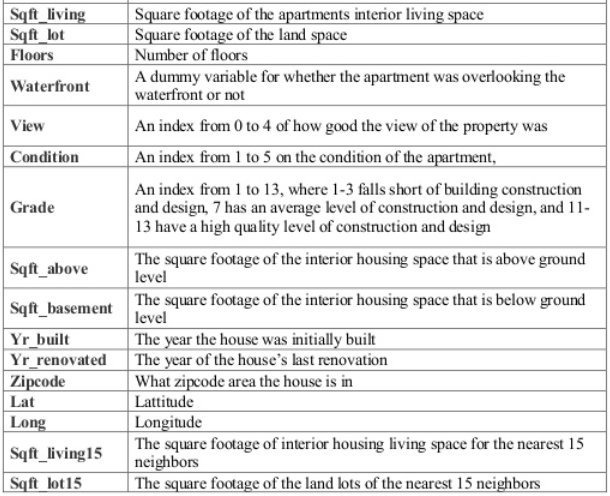

# Cleaning The Data
1. Convert Column date dtype to datetime

In [82]:
df['date'] = df['date'].astype('datetime64')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Cleaning The Data
2. Check for Outliers And Handling Them

In [83]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [84]:
# We choose the columns needed which is numerical columns
numerical = df.drop(columns=['id','date'])
numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Graphs for Price: Total = 4028


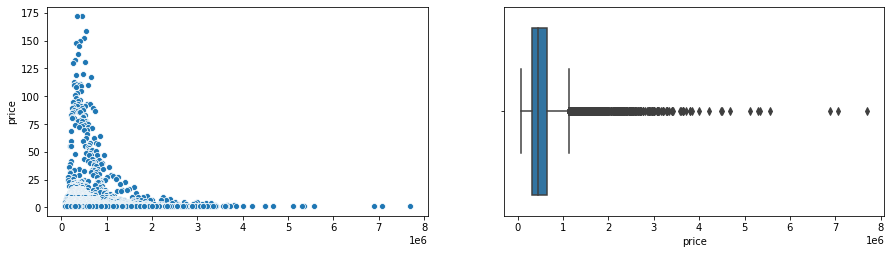

Graphs for Bedrooms: Total = 13


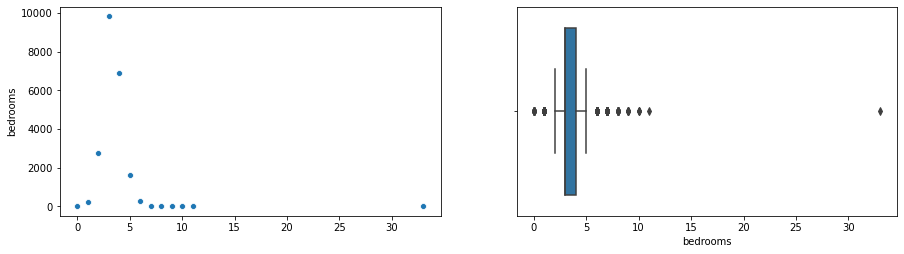

Graphs for Bathrooms: Total = 30


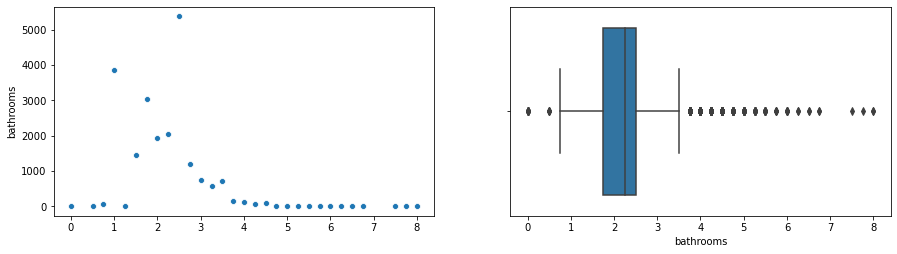

Graphs for Sqft_living: Total = 1038


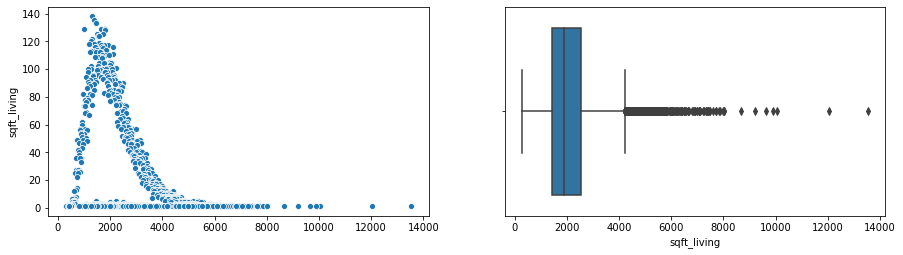

Graphs for Sqft_lot: Total = 9782


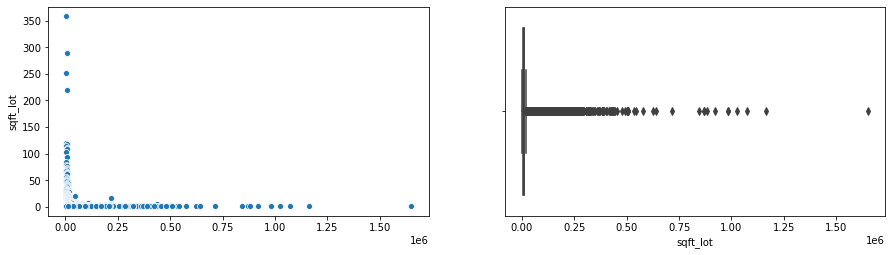

Graphs for Floors: Total = 6


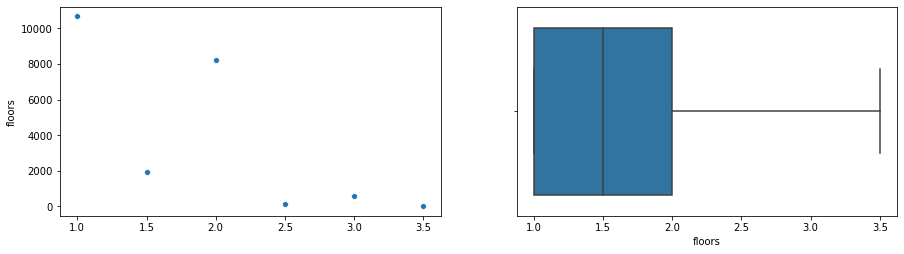

Graphs for Waterfront: Total = 2


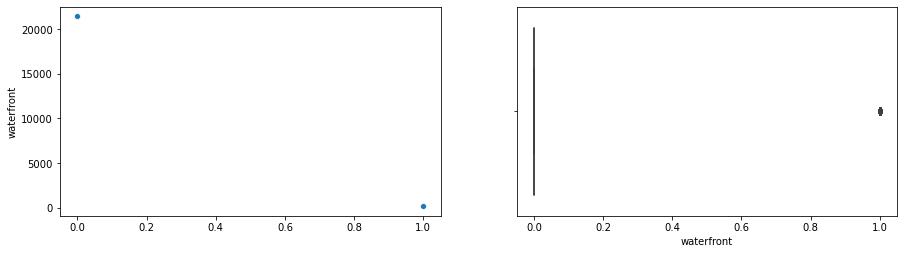

Graphs for View: Total = 5


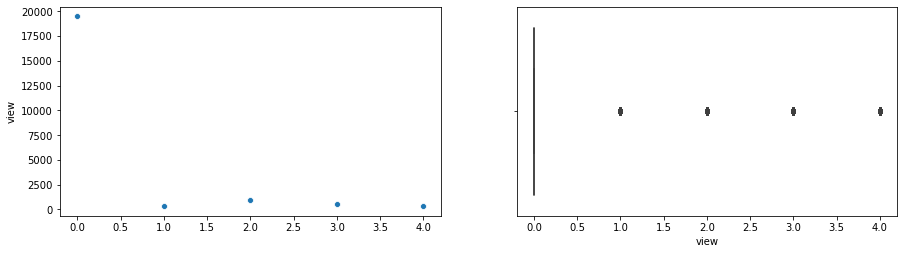

Graphs for Condition: Total = 5


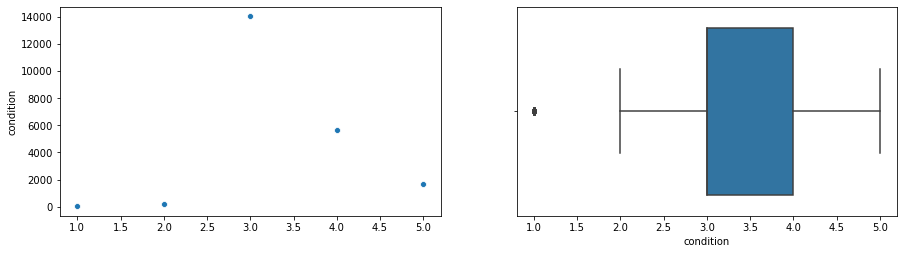

Graphs for Grade: Total = 12


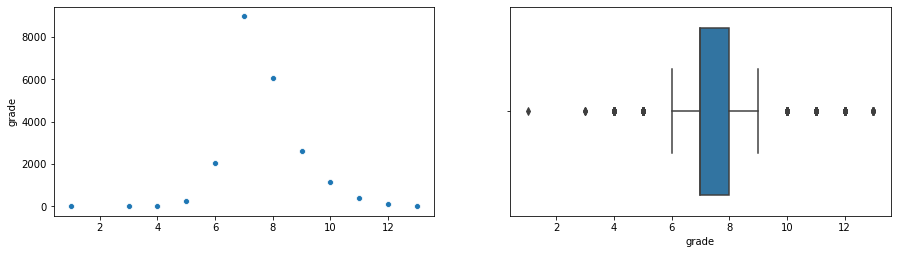

Graphs for Sqft_above: Total = 946


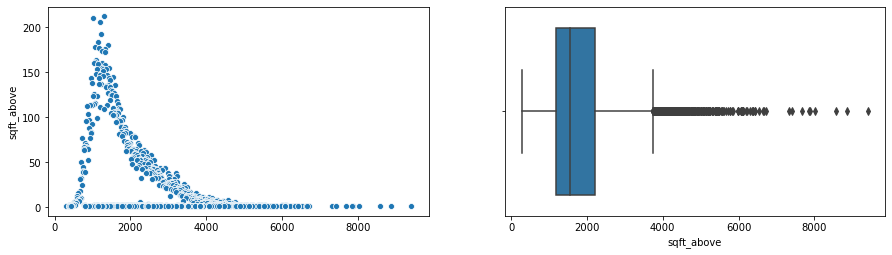

Graphs for Sqft_basement: Total = 306


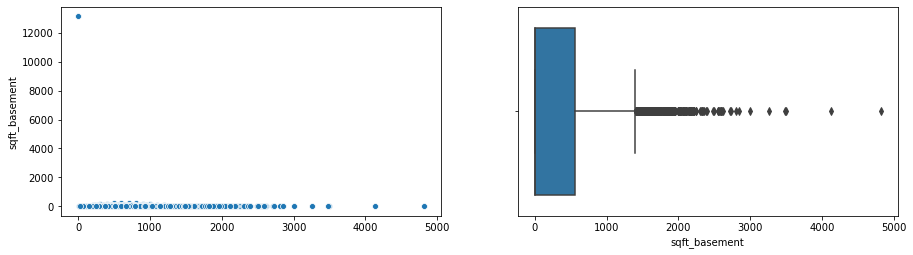

Graphs for Yr_built: Total = 116


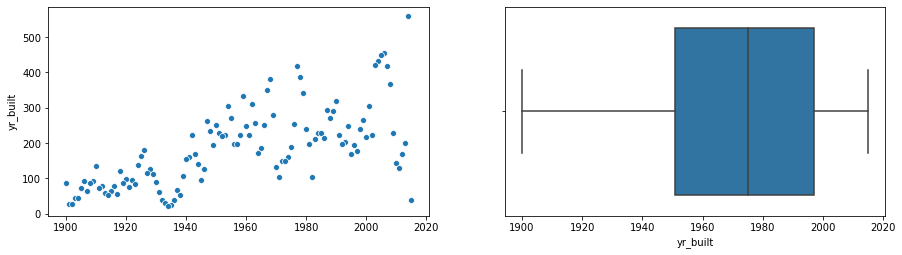

Graphs for Yr_renovated: Total = 70


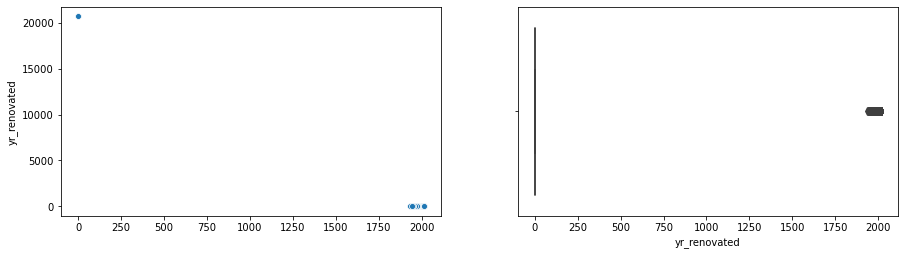

Graphs for Zipcode: Total = 70


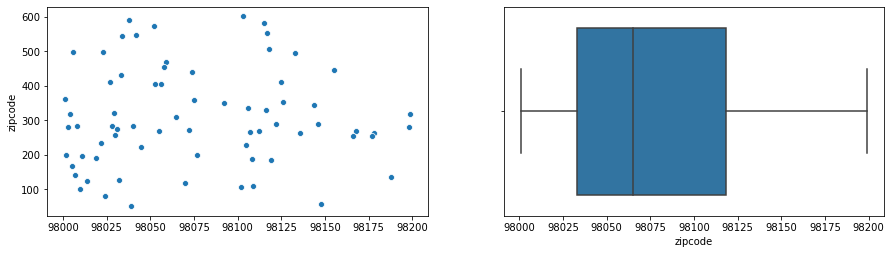

Graphs for Lat: Total = 5034


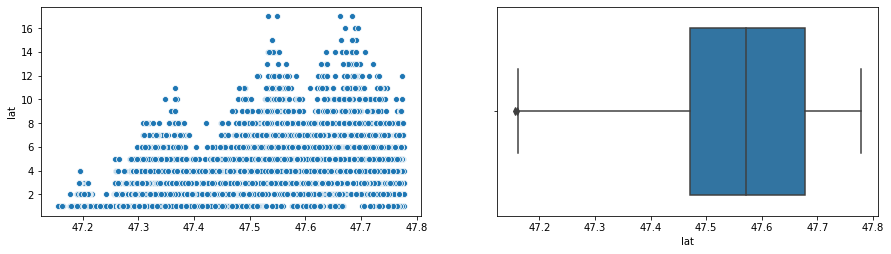

Graphs for Long: Total = 752


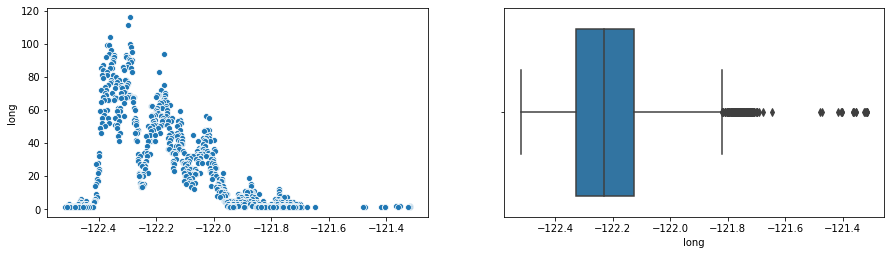

Graphs for Sqft_living15: Total = 777


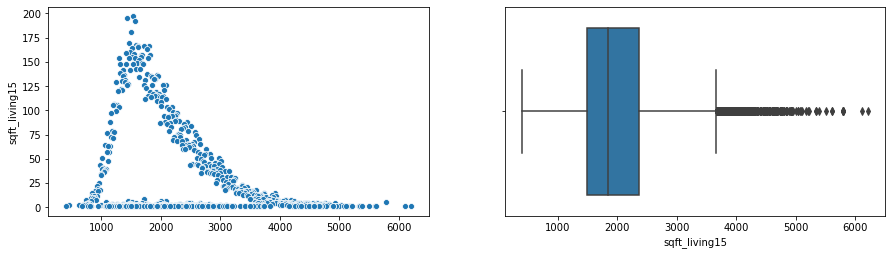

Graphs for Sqft_lot15: Total = 8689


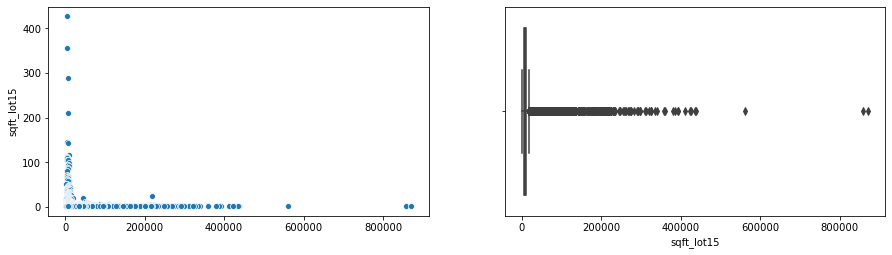

In [85]:
def plot_scatterplots():
    for i in numerical.columns:
        num = numerical[i].value_counts()
        print('Graphs for {}: Total = {}'.format(i.capitalize(), len(num)))
        
        fig = plt.figure(figsize=(15, 10))
        plt.subplots_adjust(hspace = 0.6)
        
        plt.subplot(221)
        sns.scatterplot(x=num.index, y=num)
     
        plt.subplot(222)
        sns.boxplot(x=numerical[i])
        
        plt.show()
        
plot_scatterplots()

Some thoughts from the graph above:
1. Maybe we can remove houses where the prices are above 4 million to make the predictions more accurate
2. Houses that have 0 bedrooms doesn't make sense so we should remove them, Also the house with 33 bedrooms
3. There is also 1 house with 0 bathroom that we might should have remove
4. Sqft_living - Possily remove houses that are over 12,000sqft?
5. sqft_lot - Remove anything over 750,000sqft?
6. sqft_above - Possibly remove listings that are over 8000sqft? Maybe even over 6500sqft - depending on the number of listings.
7. sqft_basement - Drop listings that are over 3000sqft?
8. sqft_lot15 - Drop listings that are over 500,000sqft?

### Price - Outlier

In [86]:
df['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

In [87]:
df[df['price'] > 4000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [88]:
len(df[df['price'] > 4000000])
# Only 11 Rows of data so we'll just drop it

11

In [89]:
df = df[df.price < 4000000]
df[df['price'] > 4000000] #To verify if we have deleted it

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### Bedrooms - Outliers

In [90]:
# 11 and 33 bedroom homes are clearly anomalies as they only have 1 listing each. 10 bedroom homes are also very rare with 3 listings. 
# I'll remove all homes with 10, 11, and 33 bedrooms. 

df.bedrooms.value_counts()

3     9824
4     6880
2     2760
5     1594
6      269
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [91]:
# Drop 10, 11, and 33 bedroom homes

df = df[df.bedrooms < 10]

In [92]:
# Let's examine homes with 0 bedrooms.

# A house with 0 bedrooms doesn't make sense to me. There are houses with 0 bedrooms and 0 bathrooms but have huge lots? 
# Are these possibly offices? Was the data not entered correctly?
# I'm going to drop all of these rows because I think we'll come up with more accurate models this way. 

df[df.bedrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [93]:
# Drop houses with 0 bedrooms

df = df[df.bedrooms > 0]

### Bathrooms - Outliers

In [94]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
1.25       9
5.50       8
0.50       4
6.00       4
0.00       3
5.75       3
6.25       2
6.50       2
8.00       1
7.50       1
6.75       1
Name: bathrooms, dtype: int64

In [95]:
# A house with no bathrooms? Again, is this possibly some sort of store/office? Still seems strange if that's the case. 
# I'm going to drop the 3 rows.

df[df.bathrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


In [96]:
df = df[df.bathrooms > 0]

In [97]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
1.25       9
5.50       8
6.00       4
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
7.50       1
6.75       1
Name: bathrooms, dtype: int64

In [98]:
# I'm going to drop houses that have between 1-3 value counts (number of bathrooms from above) as I think this will lead to more accurate results.

df = df[df.bathrooms != 6.75]
df = df[df.bathrooms != 7.50]
df = df[df.bathrooms != 8.00]
df = df[df.bathrooms != 6.50]
df = df[df.bathrooms != 6.25]

In [99]:
df.bathrooms.value_counts() #Final Result

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
1.25       9
5.50       8
6.00       4
0.50       4
5.75       3
Name: bathrooms, dtype: int64

### Sqft_living - outliers

In [100]:
# The rows with sqft living above 12000 also were removed because of the previous outliers

df[df.sqft_living > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### Sqft lot - outliers

In [101]:
df.sqft_lot.value_counts()

5000      358
6000      289
4000      251
7200      220
7500      119
         ... 
11148       1
27540       1
35736       1
1448        1
315374      1
Name: sqft_lot, Length: 9760, dtype: int64

In [102]:
print(len(df[df.sqft_lot > 750000]))
df[df.sqft_lot > 750000]

11


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
3949,722069232,2014-09-05,998000.0,4,3.25,3770,982998,2.0,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141
4441,3626079040,2014-07-30,790000.0,2,3.00,2560,982278,1.0,0,0,3,8,2560,0,2004,0,98014,47.6955,-121.861,1620,40946
4540,2522029039,2014-09-29,550000.0,3,2.00,3650,843309,2.0,0,0,4,7,3650,0,1991,0,98070,47.3627,-122.496,1870,273992
6691,2624089007,2015-03-20,1998000.0,2,2.50,3900,920423,2.0,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
7077,2724079090,2015-01-05,1650000.0,4,3.25,3920,881654,3.0,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896,2970,112384
7647,2623069031,2014-05-21,542500.0,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
7769,2323089009,2015-01-19,855000.0,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
9714,225079036,2015-01-07,937500.0,4,4.00,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
17319,3326079016,2015-05-04,190000.0,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730


In [103]:
# Let's drop the 11 rows of homes that have a lot of over 7500000 as they seem like outliers.

df = df[df.sqft_lot < 750000]

### Sqft above - outliers

- Maybe remove listings that are over 8000sqft? Possibly even over 6500 - depending on the number of listings.

In [104]:
# Seems like these were already dropped, let's check over 6500 sqft. 

df[df['sqft_above'] > 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [105]:
# Only 6 entries. Let's drop these too. 

df[df.sqft_above > 6500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11105,4054530260,2014-06-27,1820000.0,4,4.50,6640,53330,2.0,0,0,3,12,6640,0,1993,0,98077,47.7283,-122.046,4620,68625
11871,8835800350,2015-01-12,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764,5610,169549
13411,2426039123,2015-01-30,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761
16773,1630700380,2015-01-30,1920000.0,5,5.75,7730,230868,2.0,0,0,3,12,6660,1070,2004,0,98077,47.7615,-122.084,2660,39292
18594,3023069166,2014-07-08,1135250.0,5,4.00,7320,217800,2.0,0,0,3,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500
19858,2524069078,2015-01-22,2700000.0,4,4.00,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982,6210,95832


### Sqft basement - outliers

sqft_basement - Drop listings that are over 3000sqft?

In [106]:
df[df.sqft_basement > 3000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10085,7767000060,2014-09-12,1900000.0,5,4.25,6510,16471,2.0,0,3,4,11,3250,3260,1980,0,98040,47.5758,-122.242,4480,16471
15482,624069108,2014-08-12,3200000.0,4,3.25,7000,28206,1.0,1,4,4,12,3500,3500,1991,0,98075,47.5928,-122.086,4913,14663


In [107]:
# Let's drop the 2 outliers

df = df[df.sqft_basement < 3000]

### Sqft lot15 - outliers

sqft_lot15 - Drop listings that are over 500,000 sqft?

In [108]:
df[df.sqft_lot15 > 500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13464,3420069060,2014-11-07,790000.0,3,2.5,2640,432036,1.5,0,3,3,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617


In [109]:
# Drop the 1 row

df = df[df.sqft_lot15 < 500000]

### Ensuring All the outliers have been dropped

In [114]:
numerical = df.drop(columns=['id','date'])

In [ ]:
# def plot_scatterplots():
#     for i in numerical.columns:
#         num = numerical[i].value_counts()
#         print('Graphs for {}: Total = {}'.format(i.capitalize(), len(num)))
        
#         fig = plt.figure(figsize=(15, 10))
#         plt.subplots_adjust(hspace = 0.6)
        
#         plt.subplot(221)
#         sns.scatterplot(x=num.index, y=num)
     
#         plt.subplot(222)
#         sns.boxplot(x=numerical[i])
        
#         plt.show()

Graphs for Price: Total = 4007


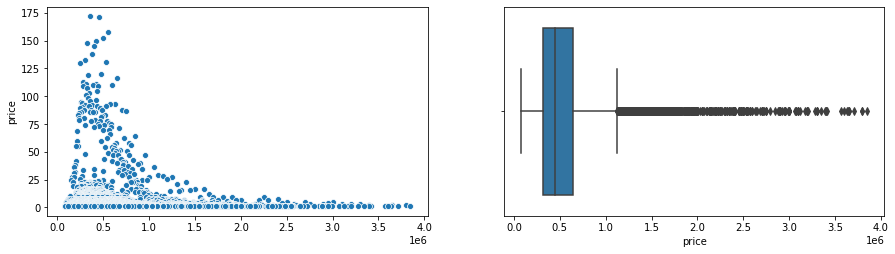

Graphs for Bedrooms: Total = 9


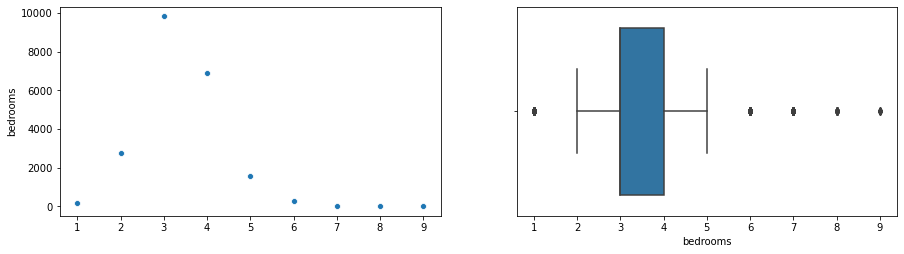

Graphs for Bathrooms: Total = 23


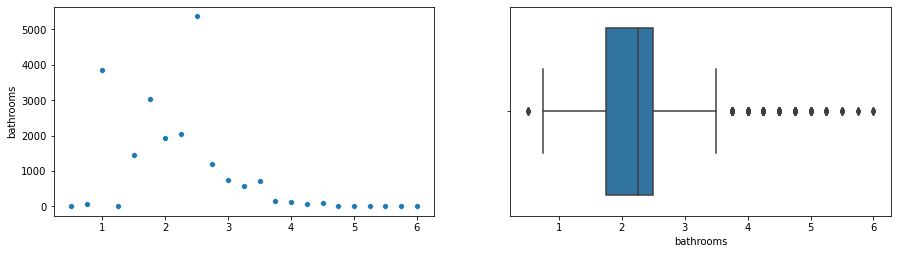

Graphs for Sqft_living: Total = 1013


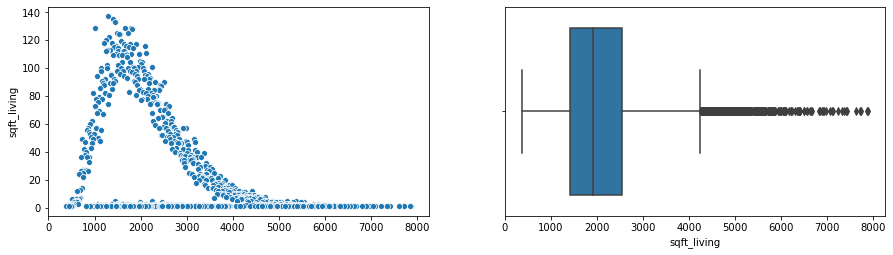

Graphs for Sqft_lot: Total = 9747


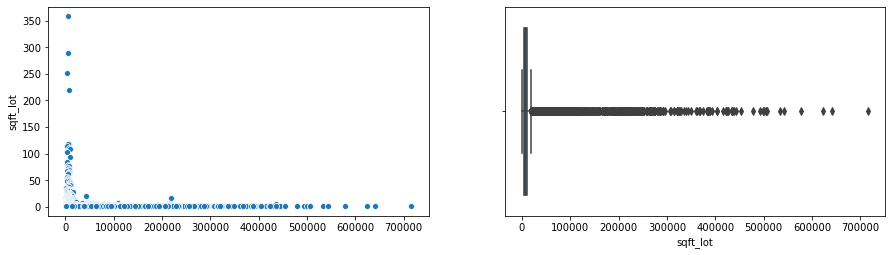

Graphs for Floors: Total = 6


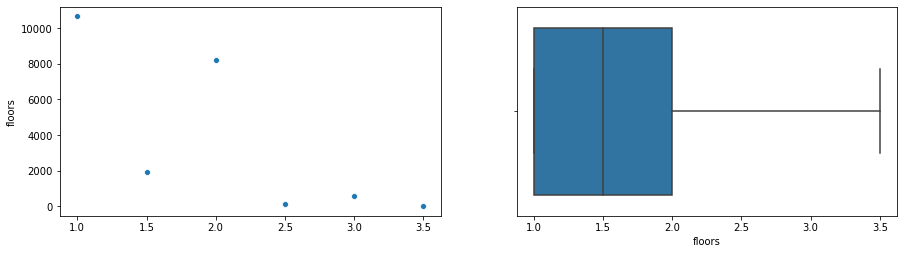

Graphs for Waterfront: Total = 2


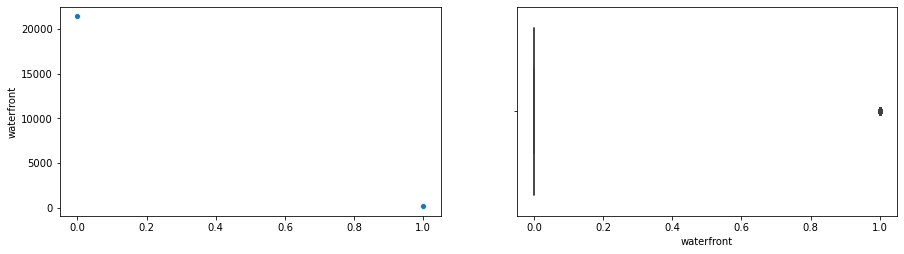

Graphs for View: Total = 5


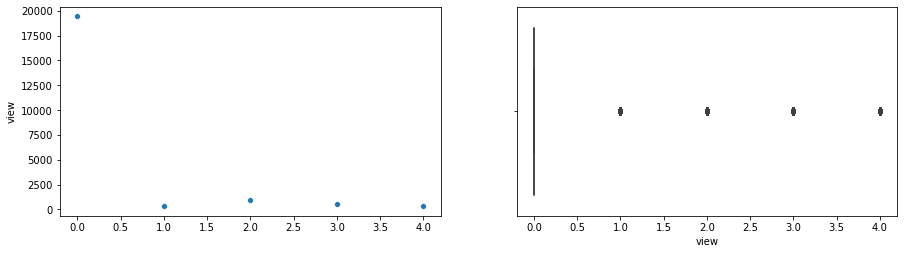

Graphs for Condition: Total = 5


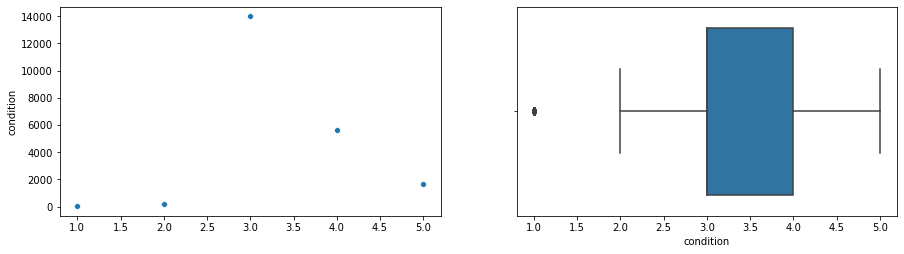

Graphs for Grade: Total = 11


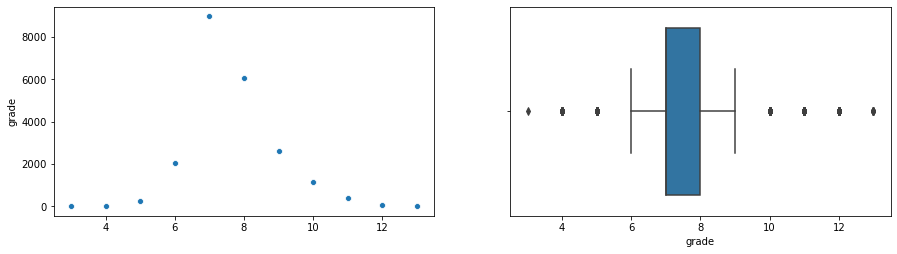

Graphs for Sqft_above: Total = 927


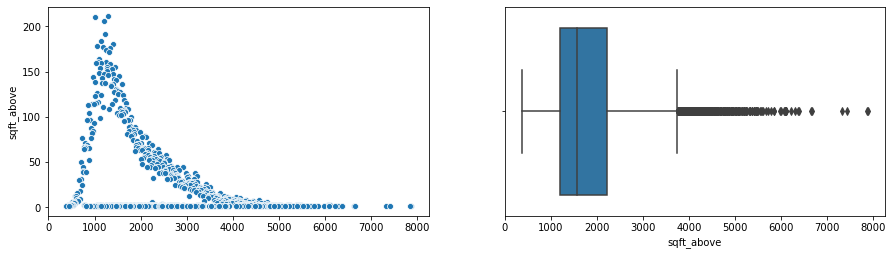

Graphs for Sqft_basement: Total = 297


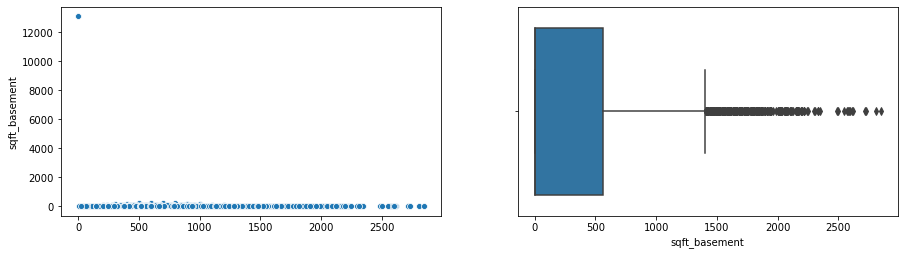

Graphs for Yr_built: Total = 116


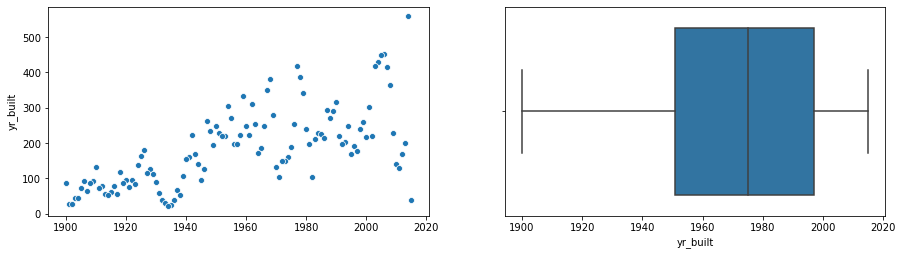

Graphs for Yr_renovated: Total = 70


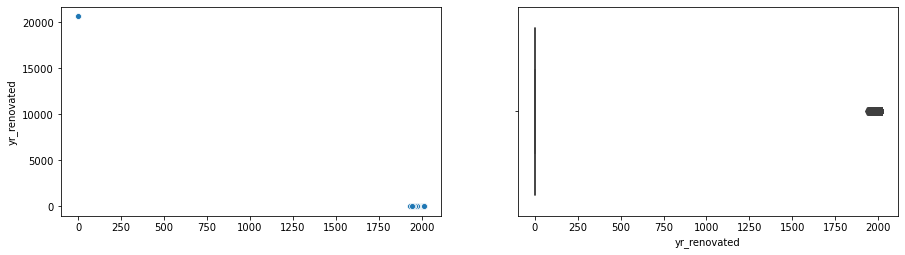

Graphs for Zipcode: Total = 70


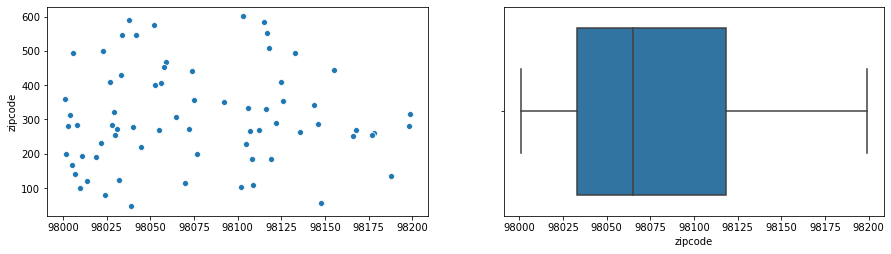

Graphs for Lat: Total = 5030


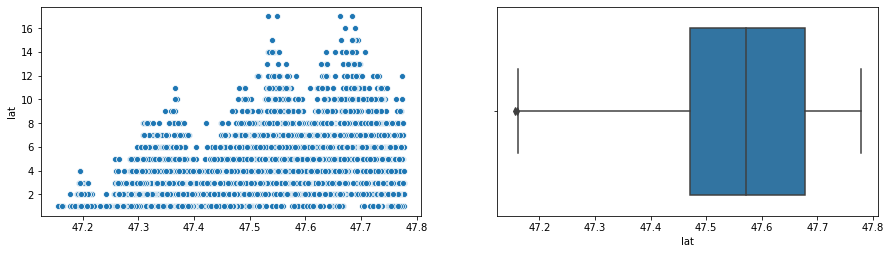

Graphs for Long: Total = 750


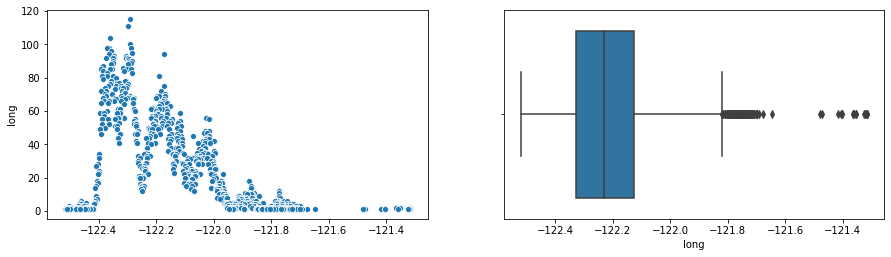

Graphs for Sqft_living15: Total = 774


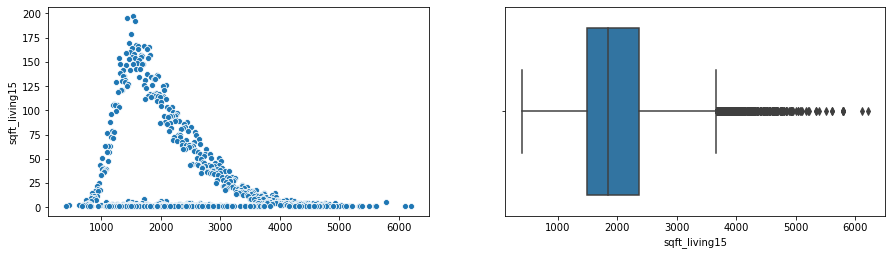

Graphs for Sqft_lot15: Total = 8660


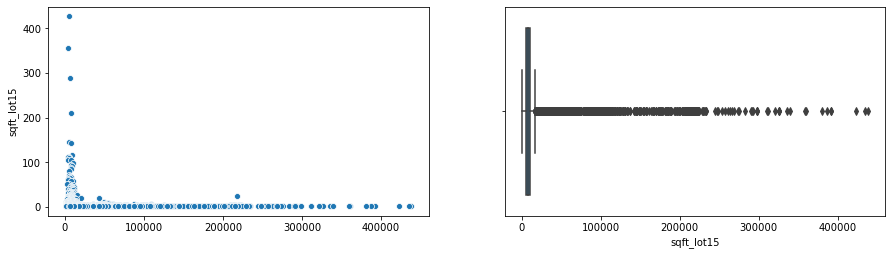

In [115]:
cols_to_plot = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]


plot_scatterplots()

Looks better now with all the clearest outliers removed, we do not remove all the outliers because we dont want our model to overfits

# Visualization And EDA

In [116]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [117]:
df.shape

(21559, 21)

In [126]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [124]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.155900e+04,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00,21559.00
mean,4.581684e+09,536595.54,3.37,2.11,2073.42,14536.53,1.49,0.01,0.23,3.41,7.65,1783.49,289.93,1970.98,84.15,98078.00,47.56,-122.21,1984.88,12575.45
std,2.876415e+09,345724.87,0.90,0.76,895.45,34065.63,0.54,0.09,0.76,0.65,1.17,814.23,437.35,29.37,401.10,53.51,0.14,0.14,682.92,25346.57
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321500.00,3.00,1.75,1420.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904940e+09,450000.00,3.00,2.25,1910.00,7610.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.309100e+09,642930.00,4.00,2.50,2550.00,10647.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10075.00
max,9.900000e+09,3850000.00,9.00,6.00,7880.00,715690.00,3.50,1.00,4.00,5.00,13.00,7880.00,2850.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,438213.00


Brief inferences from the data:

- The average house from the dataset has at least 3 bedrooms and 2 bathrooms
- Average size is about 2100 sqft. 
- Very few waterfront properties
- The average house was built in 1970

### House Price Distribution

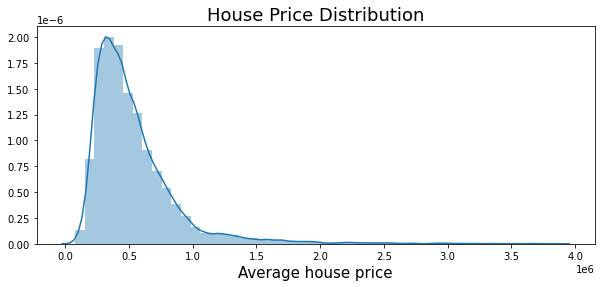

In [125]:
plt.figure(figsize=(10,4))
plt.title("House Price Distribution", size=18)
sns.distplot(df["price"])

plt.xlabel('Average house price', size=15)
plt.show()

### House Prices and Waterfront Property

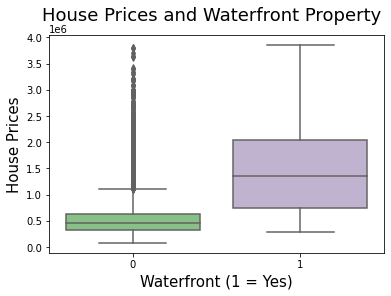

In [127]:
sns.boxplot(x = df['waterfront'], y=df['price'], palette="Accent")
plt.suptitle('House Prices and Waterfront Property', size=18)
plt.xlabel('Waterfront (1 = Yes)', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

- Waterfront properties are all  distributed within a specific range, without outliers.
- Waterfront properties are on average more expensive than regular homes 

### House Prices and Number of Floors

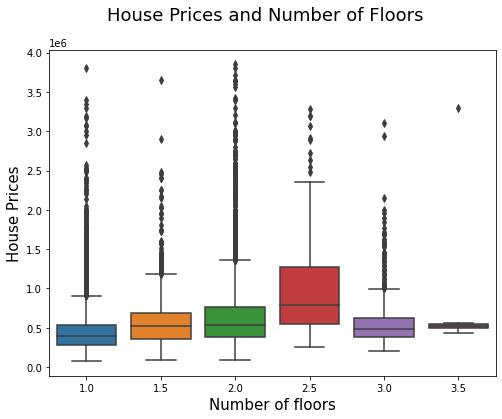

In [132]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['floors'], y=df['price'])
plt.suptitle('House Prices and Number of Floors', size=18)
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

- Lots of outliers for houses that have between 1-3 floors.
- Houses with 3.5 floors seem to have the smallest price fluctuations, But theres only 7 properties


### House Prices and Number of Bathrooms

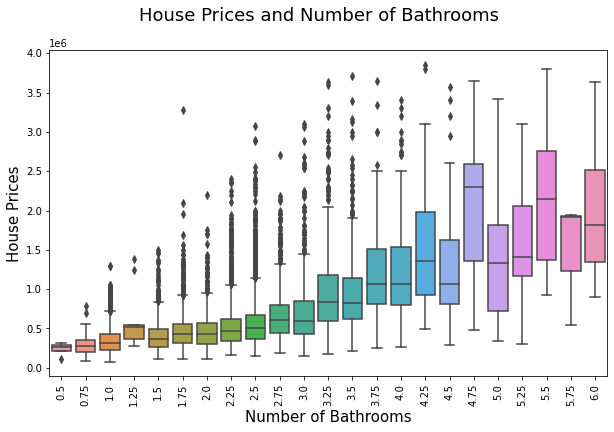

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df['bathrooms'], y=df['price'])
plt.suptitle('House Prices and Number of Bathrooms', size=18)
plt.xlabel('Number of Bathrooms', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)
plt.xticks(rotation=90)

plt.show()

- More Bathrooms means higher House Prices
- Lots of outliers exist in the data
- On 5 bathrooms the price begins to fluctuate significantly. This is probably because theres only minimum amount of dataset which have that amount of bathrooms

### House Price and Size Comparison

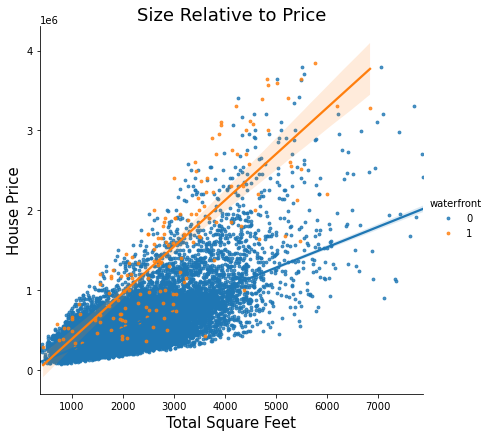

In [134]:
sns.lmplot(x='sqft_living', y='price', data=df, scatter_kws={'s':8}, hue='waterfront', height=6)

plt.title('Size Relative to Price', size=18)
plt.ylabel('House Price', size=15)
plt.xlabel('Total Square Feet', size=15)


plt.show()

- The price for waterfront properties is higher on average than those without a waterfront.
- As the house size increases, the price gap significantly widens between waterfront/non waterfront houses.

### Year Built and Price

- Does the year built notably impact the price? Are newer homes more expensive? 

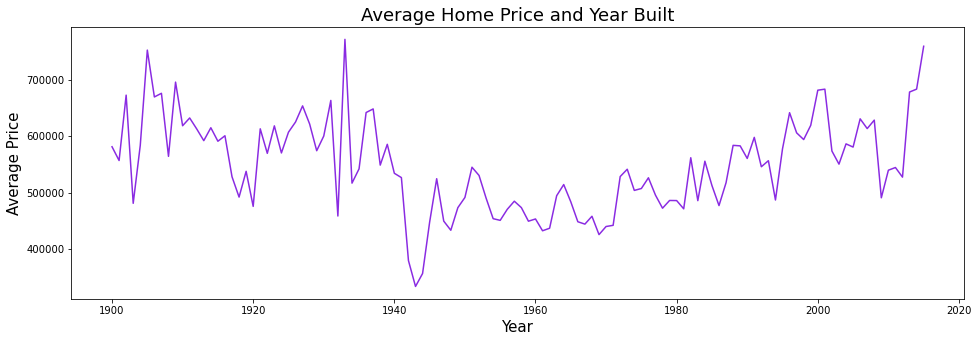

In [135]:
plt.figure(figsize=(16,5))

sns.lineplot(x='yr_built', y='price', data=df,linewidth=1.5, color='blueviolet', ci=None)

plt.title('Average Home Price and Year Built', size=18)
plt.ylabel('Average Price', size=15)
plt.xlabel('Year', size=15)

plt.show()

In [136]:
# Check the oldest/newest year built

print(df.yr_built.min())
print(df.yr_built.max())

1900
2015


- Houses built before 1940 and after 2000 have a higher average price.
- Houses approximately between 1945 - 1980 cost less on average.
- Is this possibly due to most very old houses (before 1940) having been renovated?

# Correlation Between Variables

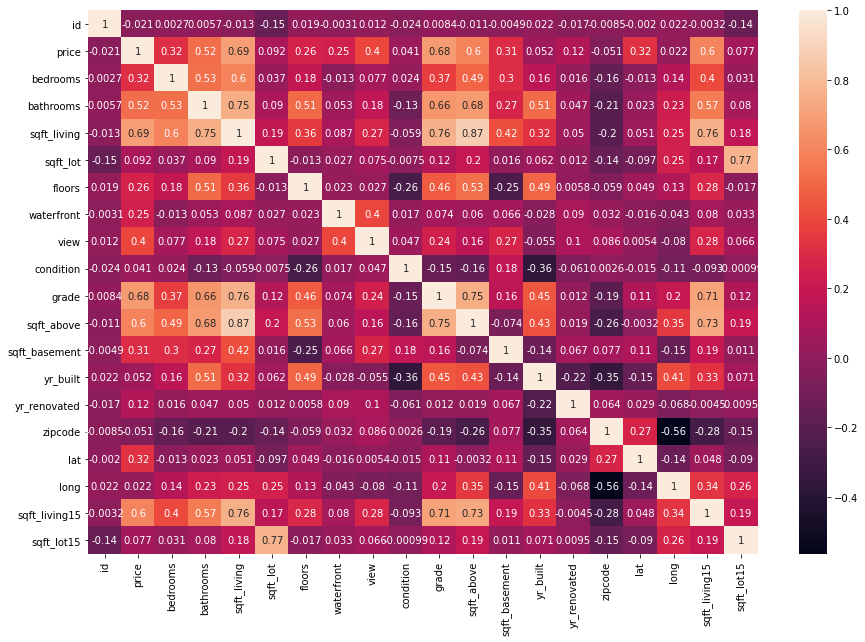

In [139]:
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

plt.show()

In [140]:
# Sort the highest/lowest correlated variables

high_corr = df.corr()['price'].sort_values(ascending=False)
high_corr

price            1.000000
sqft_living      0.691918
grade            0.676290
sqft_living15    0.596872
sqft_above       0.595247
bathrooms        0.518147
view             0.395321
lat              0.321942
bedrooms         0.318661
sqft_basement    0.308470
floors           0.263775
waterfront       0.247426
yr_renovated     0.123452
sqft_lot         0.091593
sqft_lot15       0.077307
yr_built         0.052327
condition        0.041413
long             0.022139
id              -0.020856
zipcode         -0.050737
Name: price, dtype: float64

# Model Building


In [164]:
# Drop the price column and variables with low correlations

pd.options.display.float_format = "{:.4f}".format # Lets show the results with 4 decimal places

dropped_vars = ['price','id', 'date','long']

X = df.drop(dropped_vars, axis='columns')
y = df['price']

In [173]:
# Import Modules for Machine Learning

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Various ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [144]:
# Split up the training/testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Base Multiple Linear Regression Algorithm

In [148]:
model_MLR = LinearRegression()

In [149]:
model_MLR.fit(X_train, y_train)

LinearRegression()

In [167]:
# Eval Matrix for Train Data (Base Multiple Linear Regression)

In [156]:
yhat_train_pred_MLR = model_MLR.predict(X_train)
yhat_train_pred_MLR

array([ 878450.27607121,  728898.2584786 ,  319266.0123938 , ...,
        341706.64002054,  -83601.06851168, 1436646.99499422])

In [165]:
r2_train_MLR = r2_score(y_train, yhat_train_pred_MLR)
r2_train_MLR

0.7018571855031323

In [161]:
MAE_train_MLR = mean_absolute_error(y_train, yhat_train_pred_MLR)
MAE_train_MLR

122215.30918004342

In [163]:
MSE_train_MLR = mean_squared_error(y_train, yhat_train_pred_MLR)
MSE_train_MLR

36179565915.99267

In [166]:
RMSE_train_MLR = np.sqrt(MSE_train_MLR)
RMSE_train_MLR

190209.26874364633

In [168]:
# Eval Matrix for Test data (BASE Multiple Linear Regression)

In [154]:
yhat_test_pred_MLR = model_MLR.predict(X_test)
yhat_test_pred_MLR

array([644103.81076458, 667670.40889808, 789635.61450467, ...,
       477472.08063089, 440015.59460984, 799695.73929076])

In [158]:
r2_test_MLR = r2_score(y_test, yhat_test_pred_MLR)
r2_test_MLR

0.7063424209908045

In [170]:
MAE_test_MLR = mean_absolute_error(y_test, yhat_test_pred_MLR)
MAE_test_MLR

120071.70084986751

In [171]:
MSE_test_MLR = mean_squared_error(y_test, yhat_test_pred_MLR)
MSE_test_MLR

33480593817.67293

In [172]:
RMSE_test_MLR = np.sqrt(MSE_test_MLR)
RMSE_test_MLR

182977.03084724303

### Base Ridge Regression Algorithm

In [174]:
model_RR = Ridge()

In [175]:
model_RR.fit(X_train, y_train)

Ridge()

In [176]:
# Eval Matrix for Train data Ridge Regression

In [179]:
yhat_train_pred_RR = model_RR.predict(X_train)
yhat_train_pred_RR

array([ 878478.18672754,  728770.76339417,  318761.99885599, ...,
        341869.30664425,  -83370.8415509 , 1431503.50372743])

In [181]:
r2_train_RR = r2_score(y_train, yhat_train_pred_RR)
MAE_train_RR = mean_absolute_error(y_train, yhat_train_pred_RR)
MSE_train_RR = mean_squared_error(y_train, yhat_train_pred_RR)
RMSE_train_RR = np.sqrt(MSE_train_RR)

In [ ]:
# Eval Matrix for Test data Ridge Regression

In [182]:
yhat_test_pred_RR = model_RR.predict(X_test)
yhat_test_pred_RR

array([644244.72428998, 667774.51859921, 789367.05110839, ...,
       477626.05568976, 440565.03160112, 799565.64855308])

In [183]:
r2_test_RR = r2_score(y_test, yhat_test_pred_RR)
MAE_test_RR = mean_absolute_error(y_test, yhat_test_pred_RR)
MSE_test_RR = mean_squared_error(y_test, yhat_test_pred_RR)
RMSE_test_RR = np.sqrt(MSE_test_RR)

### Base Lasso Regression Algorithm

In [184]:
model_LR = Lasso()

In [186]:
model_LR.fit(X_train, y_train)

C:\Users\Yosafat\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262692870962841.12, tolerance: 196210464532.8728
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [187]:
#Eval Matrix for Train data Lasso Regression 

In [188]:
yhat_train_pred_LR = model_LR.predict(X_train)
yhat_train_pred_LR

array([ 878452.6037152 ,  728894.41025018,  319259.48324886, ...,
        341710.9819493 ,  -83593.21985808, 1436499.54992353])

In [189]:
r2_train_LR = r2_score(y_train, yhat_train_pred_LR)
MAE_train_LR = mean_absolute_error(y_train, yhat_train_pred_LR)
MSE_train_LR = mean_squared_error(y_train, yhat_train_pred_LR)
RMSE_train_LR = np.sqrt(MSE_train_LR)

In [ ]:
#Eval Matrix for Test data Lasso Regression 

In [190]:
yhat_test_pred_LR = model_LR.predict(X_test)
yhat_test_pred_LR

array([644107.12842565, 667673.70234571, 789630.38053135, ...,
       477473.23450339, 440032.16401854, 799686.76449406])

In [191]:
r2_test_LR = r2_score(y_test, yhat_test_pred_LR)
MAE_test_LR = mean_absolute_error(y_test, yhat_test_pred_LR)
MSE_test_LR = mean_squared_error(y_test, yhat_test_pred_LR)
RMSE_test_LR = np.sqrt(MSE_test_LR)

### Base Elastic Net Regression Model

In [192]:
model_ENR = ElasticNet()
model_ENR.fit(X_train, y_train)

C:\Users\Yosafat\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398163024788235.06, tolerance: 196210464532.8728
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [193]:
#Eval Matrix for Train data ElasticNet Regression 

In [194]:
yhat_train_pred_ENR = model_ENR.predict(X_train)
yhat_train_pred_ENR

array([856181.42678515, 694942.27293471, 219994.26316931, ...,
       377241.41957223,  35444.14416715, 872787.53609918])

In [195]:
r2_train_ENR = r2_score(y_train, yhat_train_pred_ENR)
MAE_train_ENR = mean_absolute_error(y_train, yhat_train_pred_ENR)
MSE_train_ENR = mean_squared_error(y_train, yhat_train_pred_ENR)
RMSE_train_ENR = np.sqrt(MSE_train_ENR)

In [196]:
#Eval Matrix for Test data ElasticNet Regression 

In [197]:
yhat_test_pred_ENR = model_ENR.predict(X_test)
yhat_test_pred_ENR

array([734986.83422632, 681127.55699825, 659057.30496285, ...,
       484914.9168559 , 616982.1667539 , 684890.90973338])

In [198]:
r2_test_ENR = r2_score(y_test, yhat_test_pred_ENR)
MAE_test_ENR = mean_absolute_error(y_test, yhat_test_pred_ENR)
MSE_test_ENR = mean_squared_error(y_test, yhat_test_pred_ENR)
RMSE_test_ENR = np.sqrt(MSE_test_ENR)

### Base Random Forest Regression Model

In [201]:
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)

RandomForestRegressor()

In [202]:
#Eval Matrix for Train data Random Foret Regression 

In [203]:
yhat_train_pred_RFR = model_RFR.predict(X_train)
yhat_train_pred_RFR

array([ 746790.36      ,  975595.        ,  384008.98      , ...,
        211391.38333333,  219585.74      , 1398332.5       ])

In [204]:
r2_train_RFR = r2_score(y_train, yhat_train_pred_RFR)
MAE_train_RFR = mean_absolute_error(y_train, yhat_train_pred_RFR)
MSE_train_RFR = mean_squared_error(y_train, yhat_train_pred_RFR)
RMSE_train_RFR = np.sqrt(MSE_train_RFR)

In [205]:
#Eval Matrix for Test data ElasticNet Regression

In [206]:
yhat_test_pred_RFR = model_RFR.predict(X_test)
yhat_test_pred_RFR

array([431130.5 , 568647.83, 943225.57, ..., 369912.44, 333661.  ,
       870831.56])

In [207]:
r2_test_RFR = r2_score(y_test, yhat_test_pred_RFR)
MAE_test_RFR = mean_absolute_error(y_test, yhat_test_pred_RFR)
MSE_test_RFR = mean_squared_error(y_test, yhat_test_pred_RFR)
RMSE_test_RFR = np.sqrt(MSE_test_RFR)

### Base XGBOOST Regression Model

In [208]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [209]:
#Eval Matrix for Train data XGBOOST Regression 

In [210]:
yhat_train_pred_xgboost = model_xgboost.predict(X_train)
yhat_train_pred_xgboost

array([ 733923.8 ,  934030.1 ,  352466.12, ...,  292984.5 ,  221190.19,
       1341840.5 ], dtype=float32)

In [211]:
r2_train_xgboost = r2_score(y_train, yhat_train_pred_xgboost)
MAE_train_xgboost = mean_absolute_error(y_train, yhat_train_pred_xgboost)
MSE_train_xgboost = mean_squared_error(y_train, yhat_train_pred_xgboost)
RMSE_train_xgboost = np.sqrt(MSE_train_xgboost)

In [212]:
#Eval Matrix for Test data XGBOOST Regression 

In [213]:
yhat_test_pred_xgboost = model_xgboost.predict(X_test)
yhat_test_pred_xgboost

array([432365.16, 555657.25, 962343.3 , ..., 363701.88, 321450.06,
       789875.6 ], dtype=float32)

In [214]:
r2_test_xgboost = r2_score(y_test, yhat_test_pred_xgboost)
MAE_test_xgboost = mean_absolute_error(y_test, yhat_test_pred_xgboost)
MSE_test_xgboost = mean_squared_error(y_test, yhat_test_pred_xgboost)
RMSE_test_xgboost = np.sqrt(MSE_test_xgboost)

In [217]:
models = pd.DataFrame({
    'Model': ['Multi Linear Regression (Train)', 'Multi Linear Regression (Test)', 'Ridge Regression (Train)', 'Ridge Regression (Train)',
              'Lasso Regression (Train)', 'Lasso Regression,(Test)', 'ElasticNet Regression (Train)', 'ElasticNet Regression (Test)',
              'Random Forest Regression (Train)', 'Random Forest Regression (Test)', 'XGBOOST Regression (Train)', 'XGBOOST Regression (Test)'],
    'R2 Score': [r2_train_MLR, r2_test_MLR, r2_train_RR, r2_test_RR, 
              r2_train_LR, r2_test_LR, r2_train_ENR, r2_test_ENR,  
              r2_train_RFR, r2_test_RFR, r2_train_xgboost, r2_test_xgboost],   
    'Mean Absolute Error': [MAE_train_MLR, MAE_test_MLR, MAE_train_RR, MAE_test_RR, 
              MAE_train_LR, MAE_test_LR, MAE_train_ENR, MAE_test_ENR,  
              MAE_train_RFR, MAE_test_RFR, MAE_train_xgboost, MAE_test_xgboost],  
    'Mean Squared Error': [MSE_train_MLR, MSE_test_MLR, MSE_train_RR, MSE_test_RR, 
              MSE_train_LR, MSE_test_LR, MSE_train_ENR, MSE_test_ENR,  
              MSE_train_RFR, MSE_test_RFR, MSE_train_xgboost, MSE_test_xgboost], 
    'Root Mean Squared Error': [RMSE_train_MLR, RMSE_test_MLR, RMSE_train_RR, RMSE_test_RR, 
              RMSE_train_LR, RMSE_test_LR, RMSE_train_ENR, RMSE_test_ENR,  
              RMSE_train_RFR, RMSE_test_RFR, RMSE_train_xgboost, RMSE_test_xgboost]})

models

# models.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Multi Linear Regression (Train),0.7019,122215.3092,36179565915.9927,190209.2687
1,Multi Linear Regression (Test),0.7063,120071.7008,33480593817.6729,182977.0308
2,Ridge Regression (Train),0.7019,122205.8414,36179835442.4044,190209.9772
3,Ridge Regression (Train),0.7064,120044.4210,33474869812.1103,182961.3889
4,Lasso Regression (Train),0.7019,122214.9527,36179566149.2330,190209.2694
5,"Lasso Regressi,(Test)",0.7063,120070.7683,33480383998.2410,182976.4575
6,ElasticNet Regression (Train),0.6212,141542.7144,45971400234.9331,214409.4220
7,ElasticNet Regression (Test),0.6232,138662.0039,42960137685.2840,207268.2747
8,Random Forest Regression (Train),0.9802,27374.6270,2400059716.0581,48990.4043
9,Random Forest Regression (Test),0.8672,70877.1875,15141933665.4494,123052.5646


### Summary

R2 Score menunjukkukan seberapa bagus model kita dibandingkan memprediksi data dengan rata-rata target


The XGBOOST regression model had the strongest results based on the R2 Score for the **Test** Data. However the model might be overfitting because theres a big difference between the R2 for the Train and Test data. Also keep in mind that these models haven't been tuned if i've tuned the models, it is for sure that the R2 score will increase and reduces the MAE for most of the models.